In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy import stats

def filtering_func(freqs, fft, f1, f2): #passing complex numbers
    filtered_fft = fft.copy() #in this way it doesn't reference to fft

    fft_in_range = np.abs(fft[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)])
    print(f'fft_in_range: {fft_in_range} ')

    peak = np.max(fft_in_range)

    peak_indices = np.where(fft_in_range == peak)[0]
    print(f"peak_indices: {peak_indices}")

    print(f"fft[peak_indices]: {fft_in_range[peak_indices]}")

    peak_f = freqs[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)][peak_indices]
    print(f"peak_f: {peak_f}")

    fft_in_range[peak_indices] = np.nan
    range_avg = np.nanmean(fft_in_range) #compute the mean excluding the point you are filtering
    print(f'range_avg: {range_avg}')

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}') #make sure you are filtering only 1 frequency
    filtered_fft[np.isin(freqs, peak_f)] = range_avg
    return filtered_fft

In [683]:
mint = 0
maxt = 10
N = 50000
step = ( maxt - mint )/N
times = np.arange(0, 10, step)
print(times)
print(f"len(times): {len(times)}")

f_s = N/maxt
print(f"f_s = {f_s} = 1/step = {1/step}")

#amplitudes1 = np.sin(5 * 2*np.pi * times + np.pi/2) 
#np.pi/2 is necessary for the fft bc it uses cos
amplitudes1 = np.cos(5 * 2*np.pi * times )
#subtracting 2 things that are off by a phase
amplitudes2 = np.cos(3 * 2*np.pi * times ) 
amplitudes = amplitudes2 + amplitudes1

amplitudes = amplitudes
amplitudes1 = amplitudes1
amplitudes2 = amplitudes2

[0.0000e+00 2.0000e-04 4.0000e-04 ... 9.9994e+00 9.9996e+00 9.9998e+00]
len(times): 50000
f_s = 5000.0 = 1/step = 5000.0


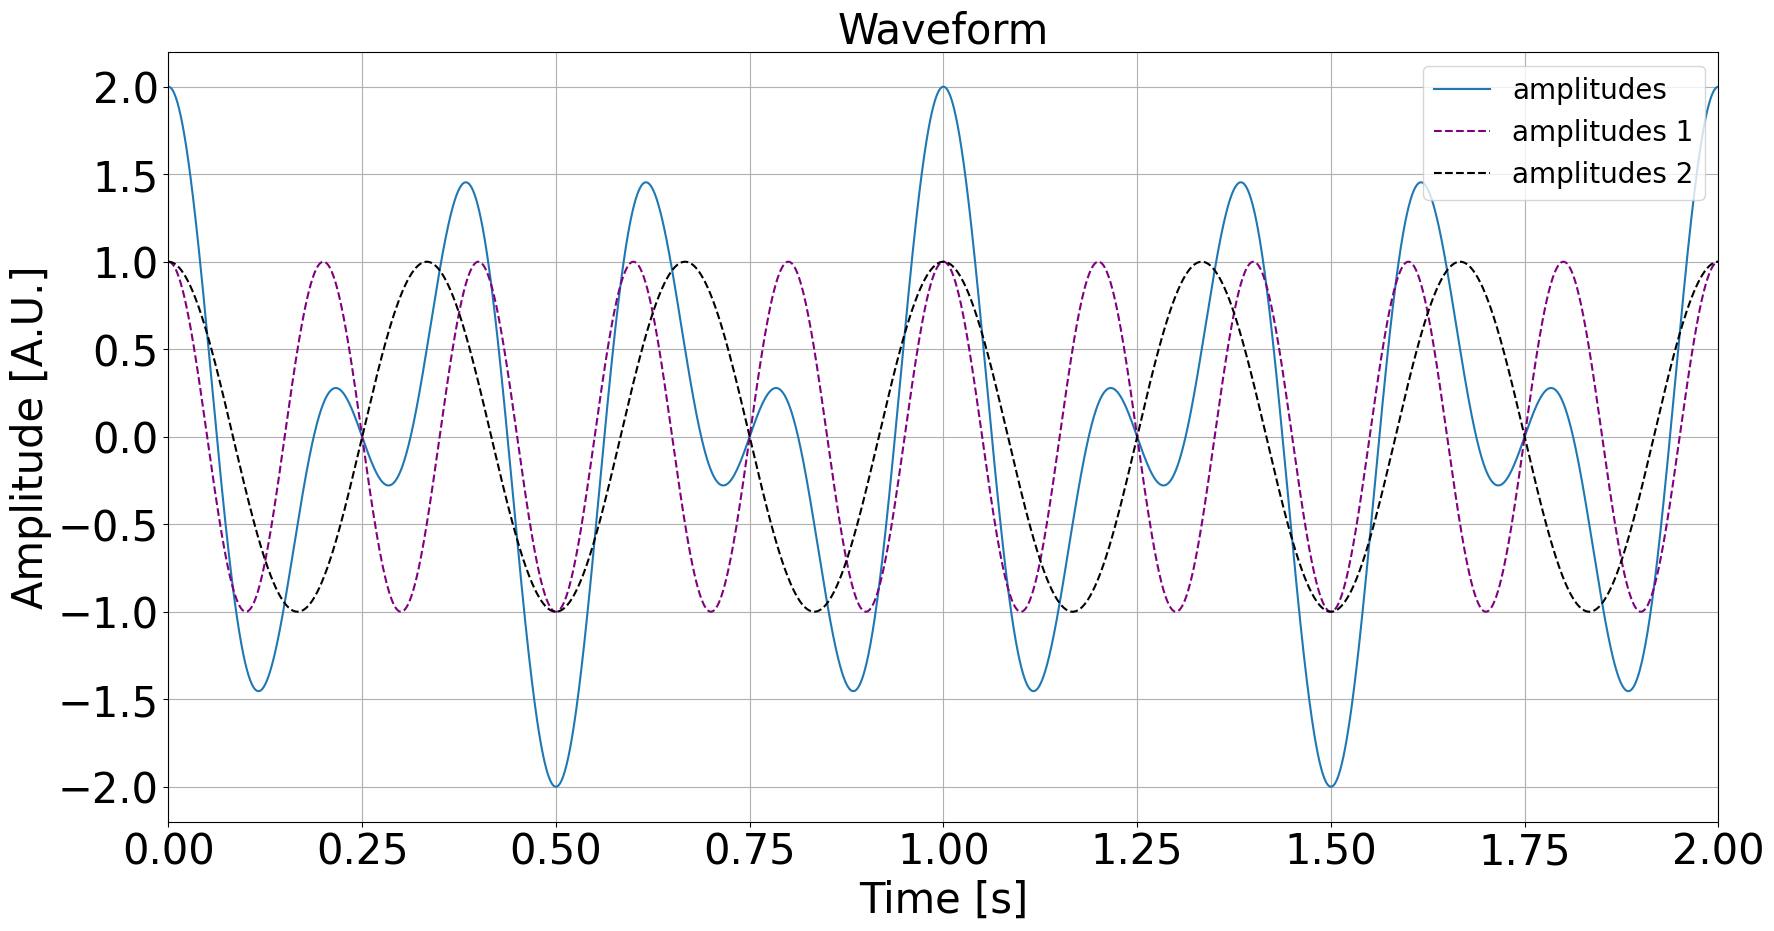

In [684]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'amplitudes')
plt.plot(times, amplitudes1, label = 'amplitudes 1', color = 'purple', linestyle = '--')
plt.plot(times, amplitudes2, label = 'amplitudes 2', color = 'black', linestyle = '--')
plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.legend(loc = 'best', fontsize = 20)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [685]:
freqs = fft.fftfreq(len(times), 1/f_s)
print(f"last freq: {freqs[-1]}") #this should be the half of f_s.
print(f"len(freqs): {len(freqs)}")
print(freqs)
magnitudes = fft.fft(amplitudes) #when i'm filtering, i'm filtering something complex
n = np.max(np.abs(magnitudes))

last freq: -0.1
len(freqs): 50000
[ 0.   0.1  0.2 ... -0.3 -0.2 -0.1]


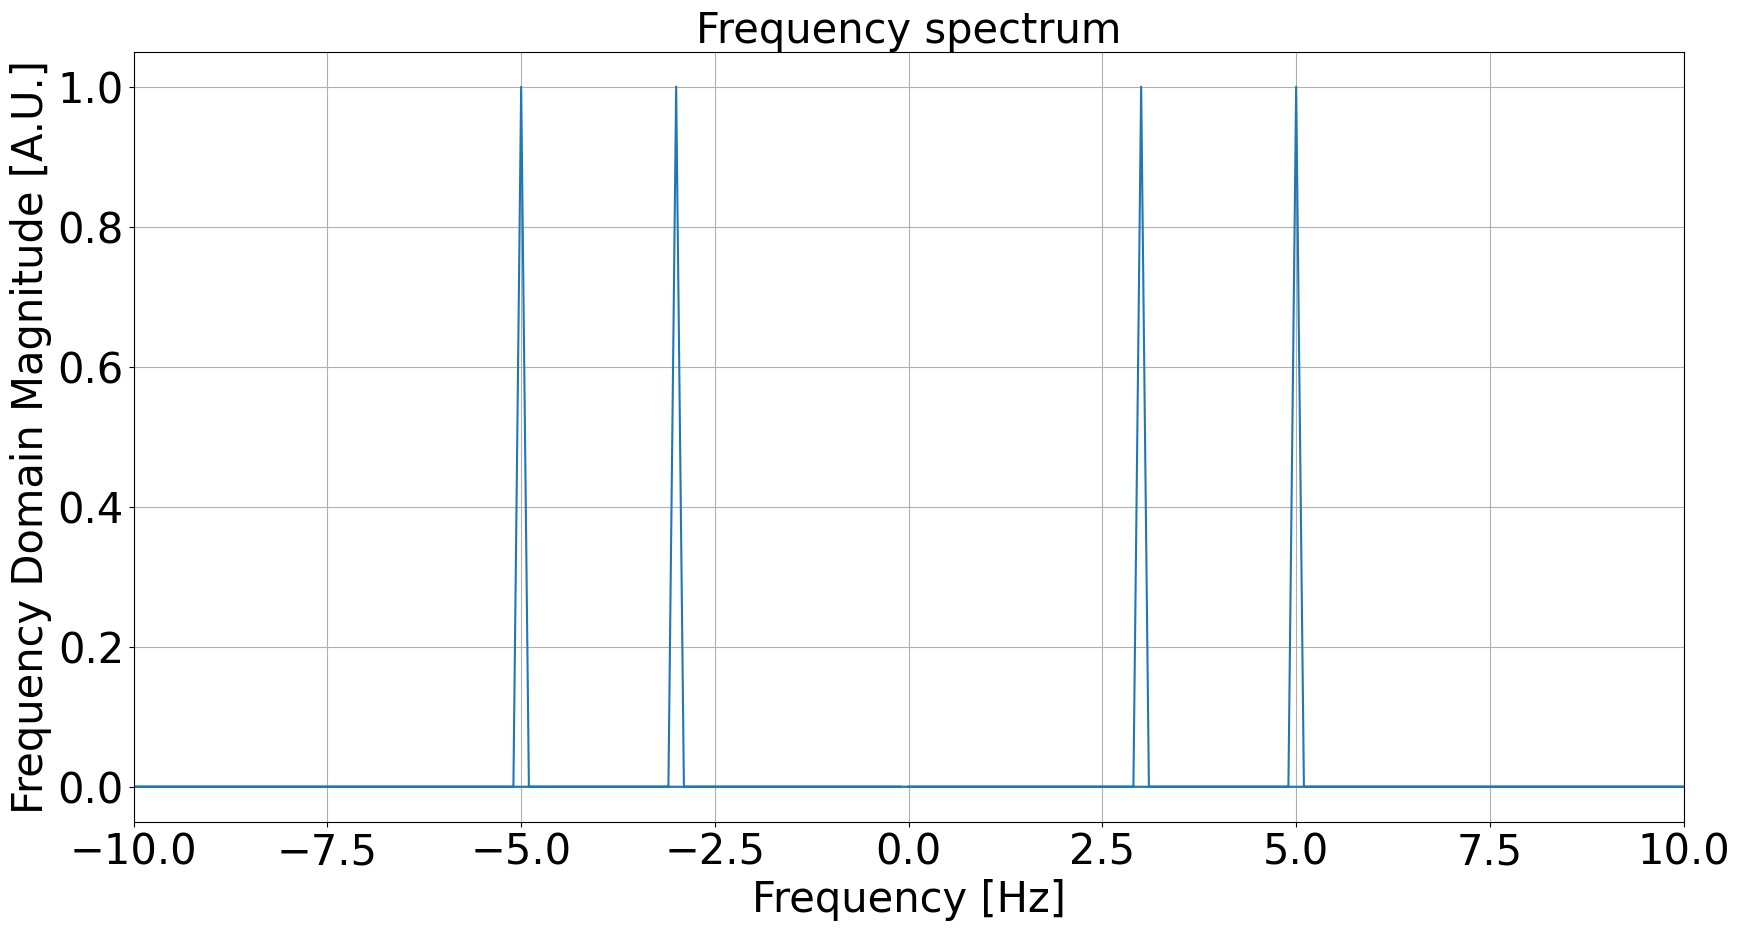

In [686]:
plt.figure(figsize=(20, 10))
plt.plot(freqs, np.abs(magnitudes)/n)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
#plt.xlim(- f_s / 2, f_s / 2) #freq of time sampling
plt.xlim(- 10, 10)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [687]:
if (N%2 == 0):
    pos_freqs = freqs[:round((N/2))]
    pos_magnitudes = magnitudes[:round((N/2))]
    pos_amplitudes = amplitudes[:round((N/2))]
else:
    pos_freqs = freqs[:round((N-1)/2 + 1)]
    pos_magnitudes = magnitudes[:round((N-1)/2 + 1)]
    pos_amplitudes = amplitudes[:round((N-1)/2 + 1)]

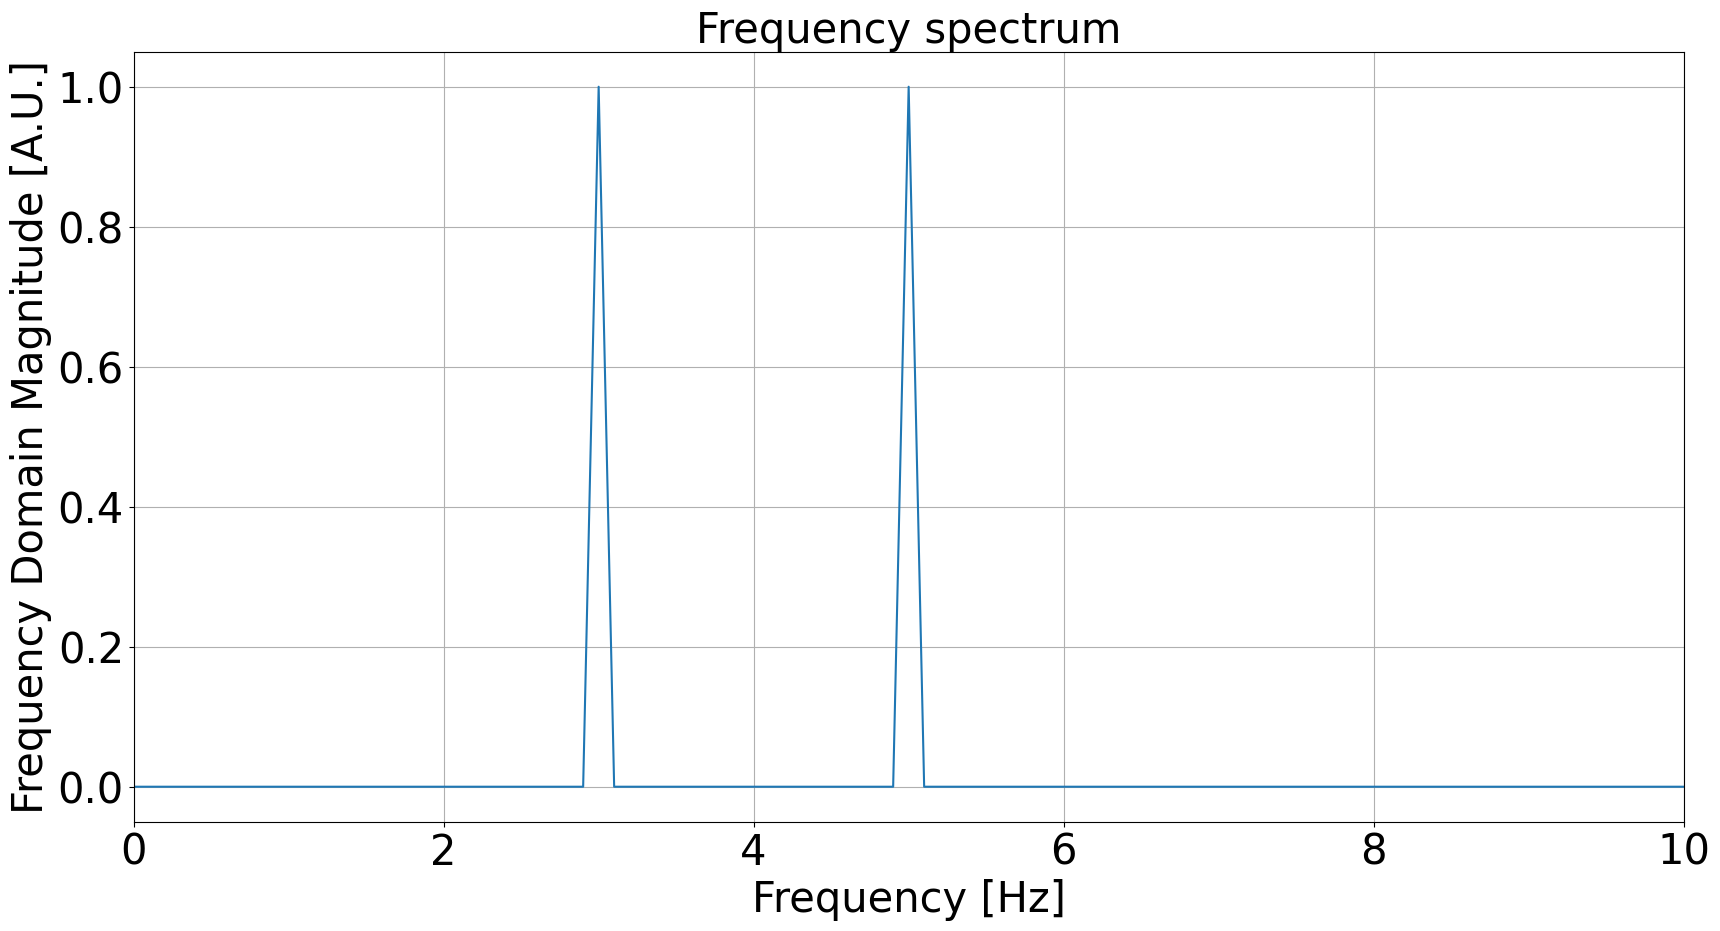

In [688]:
plt.figure(figsize=(20, 10))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
#plt.xlim(0, f_s / 2) #f_s = freq of time sampling
plt.xlim(0, 10)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [689]:
f1 = 2
f2 = 4

## Filtering

In [690]:
filtered_fft = filtering_func(freqs, magnitudes, f1, f2)
if (N%2 == 0):
    pos_filtered_fft = filtered_fft[:round((N/2))]
else:
    pos_filtered_fft = filtered_fft[:round((N-1)/2 + 1)]

fft_in_range: [1.30001790e-12 1.28984466e-12 1.62842754e-12 2.29595229e-12
 1.99848024e-12 1.88931673e-12 2.80486146e-12 3.16280201e-12
 4.70399505e-12 8.14023277e-12 2.50000000e+04 6.05517273e-12
 2.63227078e-12 1.15054075e-12 1.82499956e-12 3.13899961e-12
 3.86903284e-12 3.83799233e-12 2.87767244e-12 1.73833687e-12
 6.15369795e-13 6.15369795e-13 1.73833687e-12 2.87767244e-12
 3.83799233e-12 3.86903284e-12 3.13899961e-12 1.82499956e-12
 1.15054075e-12 2.63227078e-12 6.05517273e-12 2.50000000e+04
 8.14023277e-12 4.70399505e-12 3.16280201e-12 2.80486146e-12
 1.88931673e-12 1.99848024e-12 2.29595229e-12 1.62842754e-12
 1.28984466e-12 1.30001790e-12] 
peak_indices: [10 31]
fft[peak_indices]: [25000. 25000.]
peak_f: [ 3. -3.]
range_avg: 2.8477159172461963e-12
sum: 2


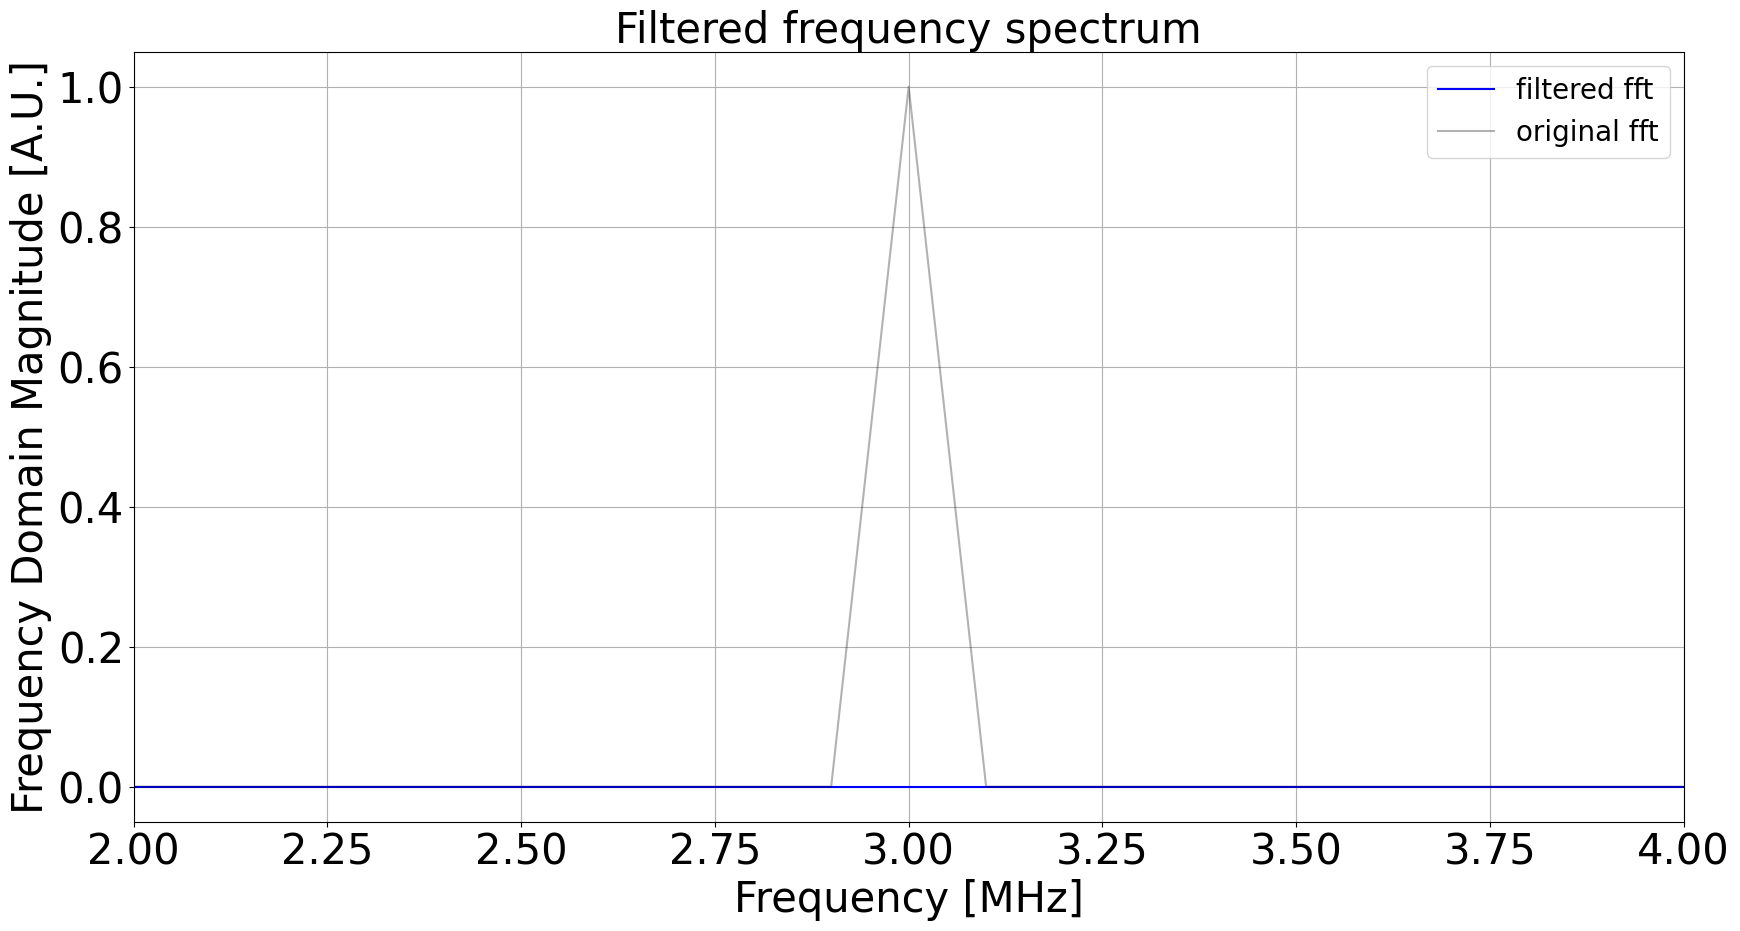

In [691]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs, avg_fft_au, yerr = stds_fft, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(pos_freqs, np.abs(pos_filtered_fft)/n, color = 'blue', label = 'filtered fft')
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n, alpha = 0.3, color = 'k', label = 'original fft')
plt.title('Filtered frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(f1, f2)
plt.legend(loc = 'best', fontsize = 20)
#plt.semilogx()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

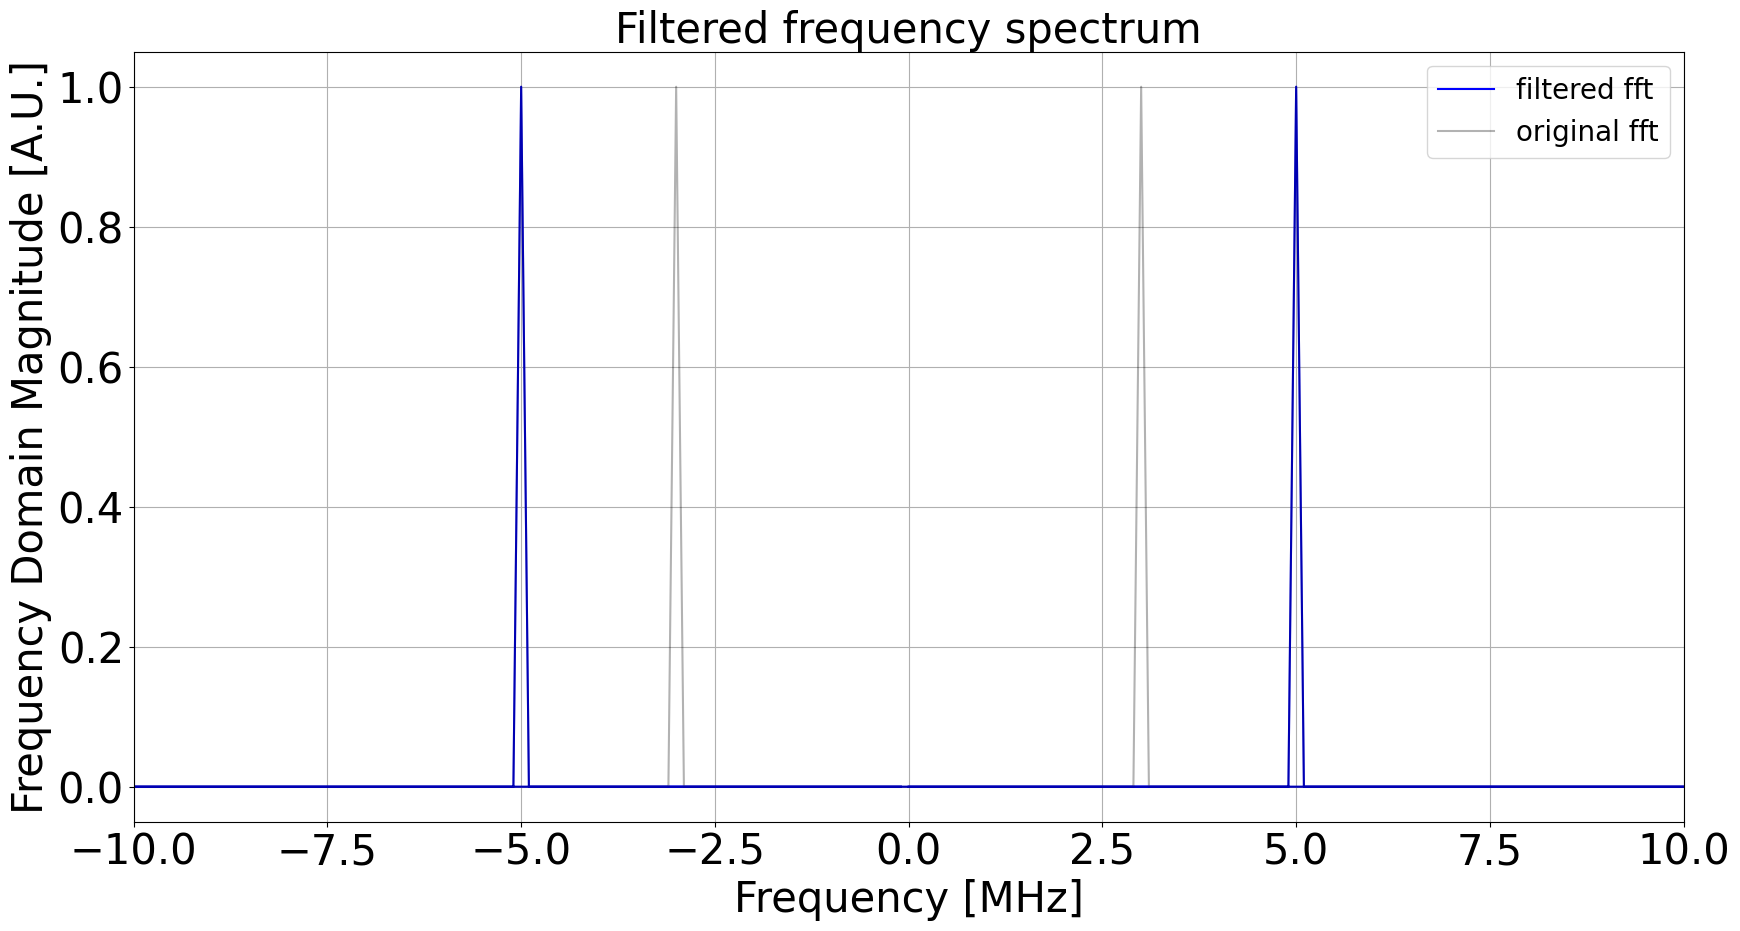

In [698]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs, avg_fft_au, yerr = stds_fft, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(freqs, np.abs(filtered_fft)/n, color = 'blue', label = 'filtered fft')
plt.plot(freqs, np.abs(magnitudes)/n, alpha = 0.3, color = 'k', label = 'original fft')
plt.title('Filtered frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(-10, 10)
plt.legend(loc = 'best', fontsize = 20)
#plt.semilogx()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## IFFT

In [693]:
#times_ifft = np.arange(N) / f_s #it's right but it's the SAME as times
filtered_amplitudes = fft.ifft(filtered_fft) #complex numbers, whole spectrum

## Compare to original waveform

In [694]:
reconstructed_wf = fft.ifft(magnitudes) #complex numbers, whole spectrum

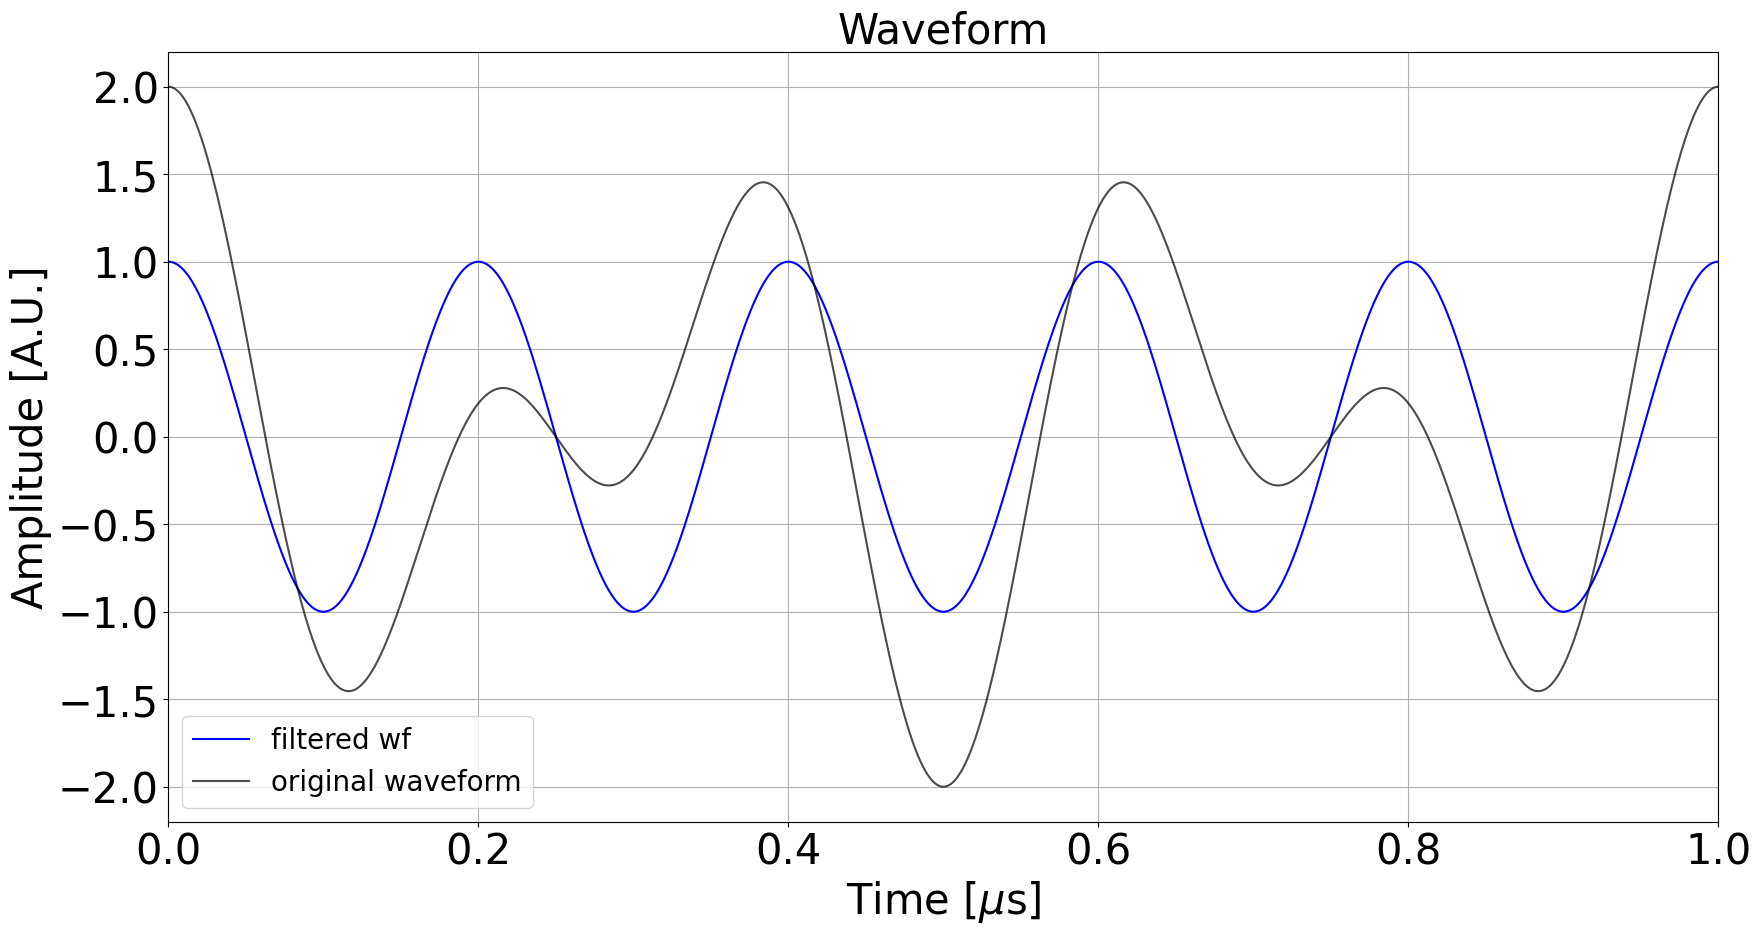

In [695]:
plt.figure(figsize = (20, 10))

plt.plot(times, filtered_amplitudes.real, label = 'filtered wf', color = 'blue') #why real?
plt.plot(times, amplitudes, label = 'original waveform', color = 'k', alpha = 0.7)
plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

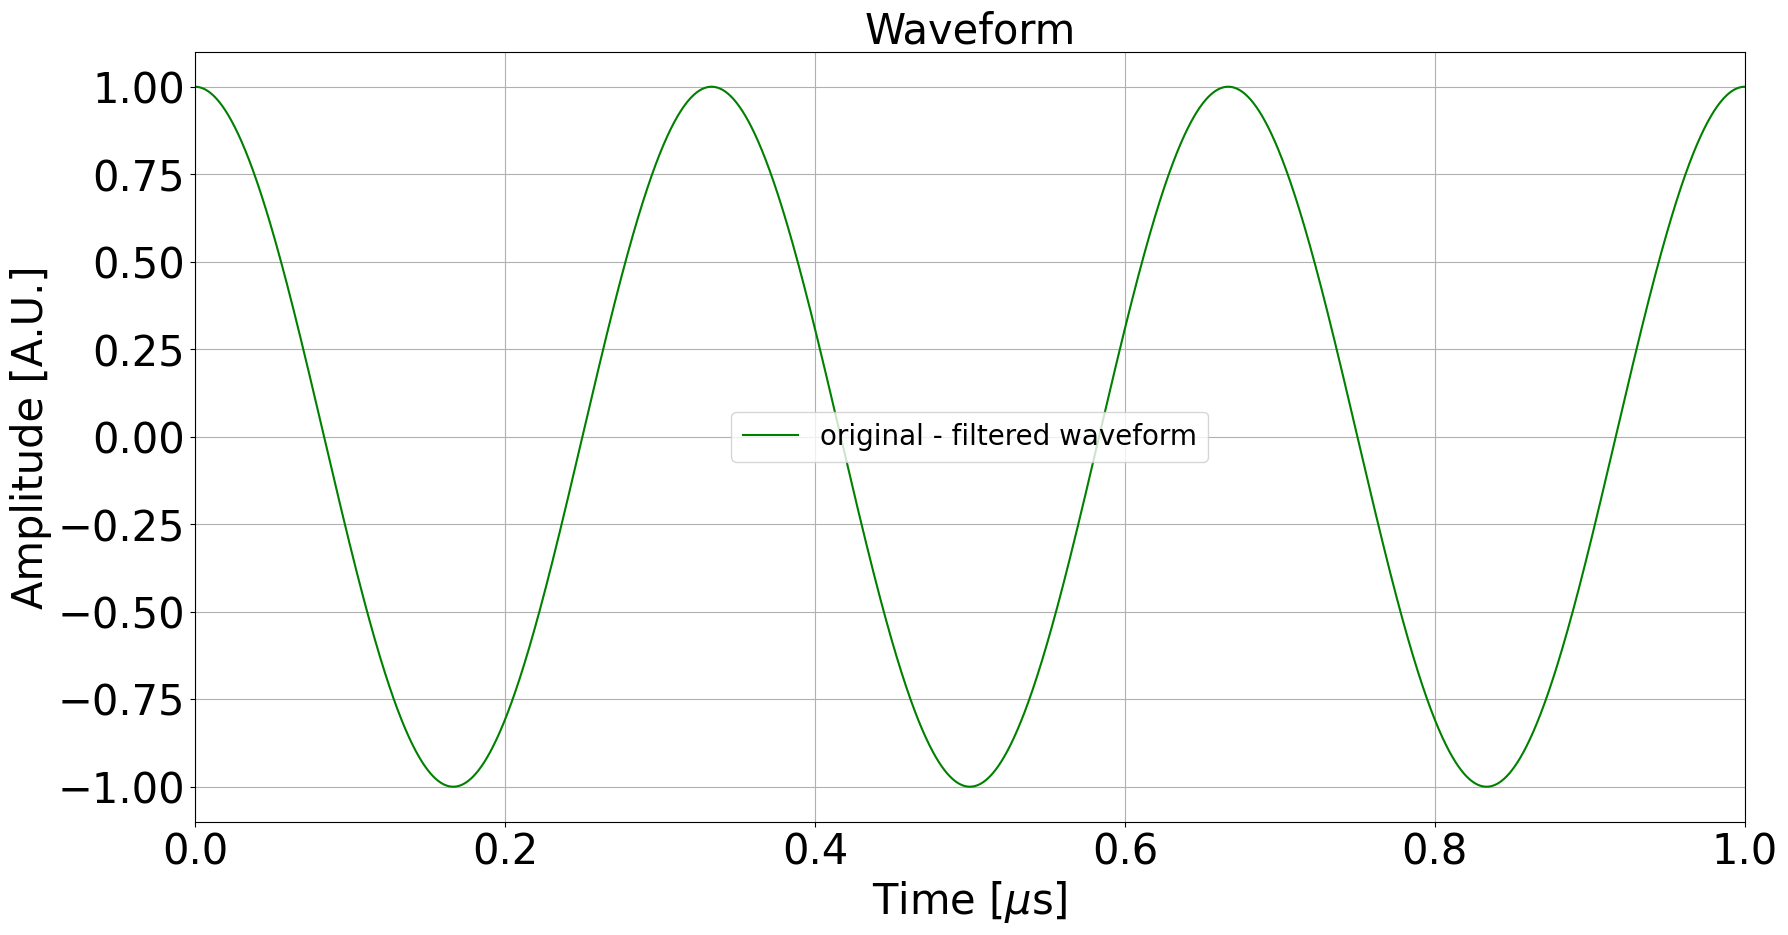

In [696]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes - filtered_amplitudes.real, label = 'original - filtered waveform', color = 'green')
plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

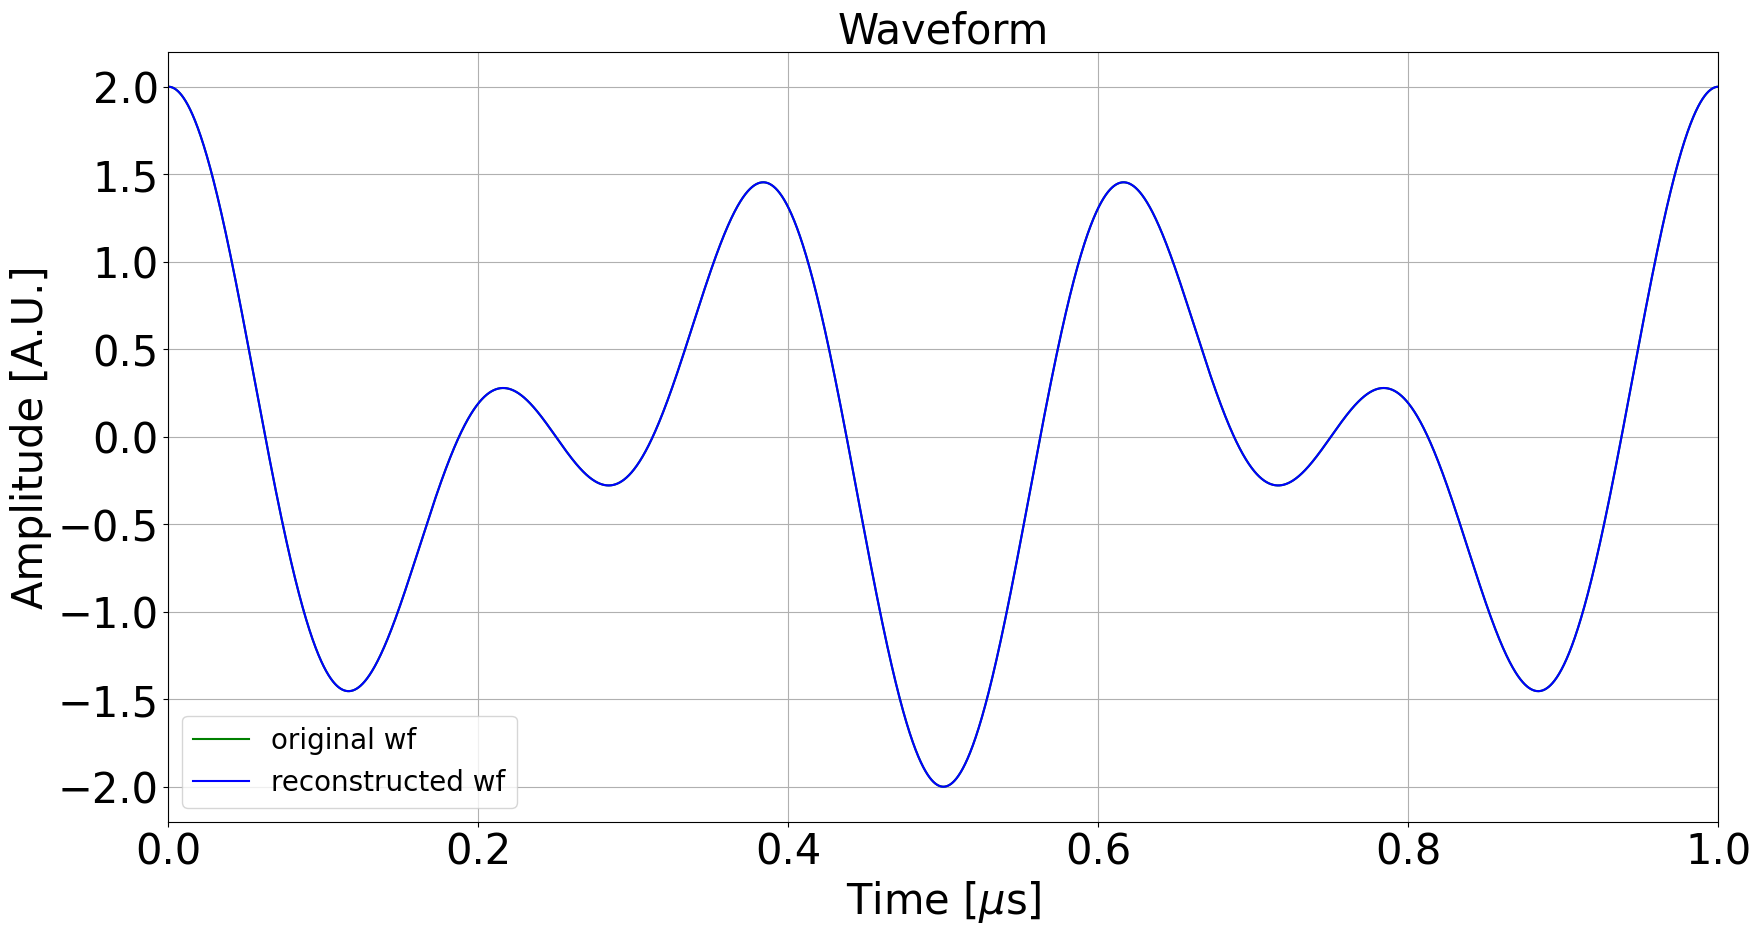

In [697]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'original wf', color = 'green')
plt.plot(times, reconstructed_wf.real, label = 'reconstructed wf', color = 'blue') #why real?

plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()